Liste des points : [(2500.0, 2500.0), (1936, 489), (1243, 1786), (1233, 639), (2926, 3568), (703, 1946), (262, 975), (2261, 1267), (1140, 4820), (1941, 476), (2908, 4873), (383, 3766), (176, 1526), (1923, 3504), (4868, 237), (900, 2879), (4133, 2819), (535, 3068), (904, 1305), (3978, 2745), (4978, 4725), (3993, 4226), (56, 2290), (2034, 2241), (2405, 3297), (1267, 759), (3790, 3273), (3911, 2153), (1165, 1231), (1231, 826), (4207, 4222), (41, 2294), (2744, 4007), (4161, 2291), (1296, 1079), (1957, 4975), (2305, 2976), (2463, 2547), (1119, 205), (1926, 2356), (3419, 2145), (2823, 1848), (1592, 2977), (4843, 3334), (4139, 74), (1791, 2646), (770, 3370), (954, 4576), (2873, 3355), (4835, 192), (1551, 4059), (2722, 1477), (233, 2379), (3788, 2330), (4098, 1933), (2162, 1407), (2593, 122), (3614, 2615), (3041, 3474), (4958, 2962), (3681, 4959), (2469, 2516), (2020, 2077), (2921, 3422), (4572, 1977), (1683, 3812), (847, 594), (3212, 3193), (2772, 3954), (935, 3886), (2330, 2286), (2357, 3745

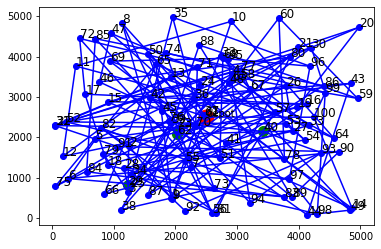

In [51]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1
        print("i : ",i)
        print("somme : ",sum(matrix[i]))
            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 100
nbvoisins = 3

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
randomPackages(3, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)
